In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import *

ensembles = [
    Ensemble("PED00156e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.top.pdb'),
    Ensemble("PED00157e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.top.pdb'),
    Ensemble("PED00158e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/ped'

featurization_params = {'featurization': "phi_psi"}
reduce_dim_params = {'method': "dimenfix", 'range_n_clusters':[2, 3, 4, 5, 6]}

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
analysis = EnsembleAnalysis(ensembles, data_dir)

analysis.load_trajectories()

Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x21a6566fdf0>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x21a6587fdc0>,
 'PED00158e001': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x21a657eda20>}

In [4]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 1653)
Feature names: ['MET1-ALA3', 'MET1-ILE4', 'MET1-ALA5', 'MET1-LYS6', 'MET1-HIS7', 'MET1-ASP8', 'MET1-PHE9', 'MET1-SER10', 'MET1-ALA11', 'MET1-THR12', 'MET1-ALA13', 'MET1-ASP14', 'MET1-ASP15', 'MET1-GLU16', 'MET1-LEU17', 'MET1-SER18', 'MET1-PHE19', 'MET1-ARG20', 'MET1-LYS21', 'MET1-THR22', 'MET1-GLN23', 'MET1-ILE24', 'MET1-LEU25', 'MET1-LYS26', 'MET1-ILE27', 'MET1-LEU28', 'MET1-ASN29', 'MET1-MET30', 'MET1-GLU31', 'MET1-ASP32', 'MET1-ASP33', 'MET1-SER34', 'MET1-ASN35', 'MET1-TRP36', 'MET1-TYR37', 'MET1-ARG38', 'MET1-ALA39', 'MET1-GLU40', 'MET1-LEU41', 'MET1-ASP42', 'MET1-GLY43', 'MET1-LYS44', 'MET1-GLU45', 'MET1-GLY46', 'MET1-LEU47', 'MET1-ILE48', 'MET1-PRO49', 'MET1-SER50', 'MET1-ASN51', 'MET1-TYR52'

{'PED00156e001': array([[0.62181395, 0.8748281 , 1.0244368 , ..., 0.5381905 , 0.65995586,
         0.5500405 ],
        [0.6740468 , 0.94238734, 1.2103361 , ..., 0.696765  , 0.7199101 ,
         0.5397694 ],
        [0.54331213, 0.5967415 , 0.8770647 , ..., 0.6101002 , 0.9751156 ,
         0.68294644],
        ...,
        [0.69683045, 0.88360864, 1.1769351 , ..., 0.5458644 , 0.8227767 ,
         0.53999794],
        [0.58550507, 0.8509589 , 1.0959796 , ..., 0.5325418 , 0.539001  ,
         0.63170296],
        [0.5536332 , 0.6240836 , 0.865476  , ..., 0.65317243, 0.5724018 ,
         0.5386198 ]], dtype=float32),
 'PED00157e001': array([[0.5444462 , 0.7421228 , 0.8755765 , ..., 0.6166486 , 0.8442986 ,
         0.689368  ],
        [0.61922514, 0.89435095, 0.93977153, ..., 0.7174825 , 0.85039765,
         0.5540449 ],
        [0.69710505, 1.0575799 , 1.2049499 , ..., 0.57521105, 0.84521836,
         0.6335973 ],
        ...,
        [0.5811551 , 0.5352497 , 0.58276105, ..., 0.6435778 ,

In [5]:
analysis.reduce_features(method='umap')

Concatenated featurized ensemble shape: (288, 1653)
For n_clusters = 2 The average silhouette_score is : 0.570171
For n_clusters = 3 The average silhouette_score is : 0.5600674
For n_clusters = 4 The average silhouette_score is : 0.5054049
For n_clusters = 5 The average silhouette_score is : 0.48409966
For n_clusters = 6 The average silhouette_score is : 0.4977026
For n_clusters = 7 The average silhouette_score is : 0.5114972
For n_clusters = 8 The average silhouette_score is : 0.50949115
For n_clusters = 9 The average silhouette_score is : 0.5102516


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446

array([[ 0.20355092,  9.174301  ],
       [-0.12809287,  9.503899  ],
       [-0.21418457,  9.38557   ],
       [-0.31561998,  8.706979  ],
       [-0.677746  ,  9.398746  ],
       [ 0.07130984,  9.29887   ],
       [ 0.41587844,  9.575076  ],
       [ 0.5161642 ,  9.120566  ],
       [ 5.0656595 ,  1.7190844 ],
       [-0.15970041,  9.240434  ],
       [ 0.43119812,  9.424571  ],
       [-0.72990686,  9.523199  ],
       [-0.2811661 ,  8.4439745 ],
       [-0.5470595 ,  9.610765  ],
       [ 0.49094534,  9.487126  ],
       [-0.473079  ,  9.745605  ],
       [-0.11722357,  8.625908  ],
       [-0.36923134,  9.765929  ],
       [ 0.7042395 ,  9.566827  ],
       [ 0.4258699 ,  8.50115   ],
       [-0.14539415,  8.851153  ],
       [ 2.296101  ,  8.190188  ],
       [ 0.40198556,  9.6215925 ],
       [ 2.3422544 ,  7.691089  ],
       [ 2.6223612 ,  7.3701987 ],
       [ 2.4320774 ,  7.7018375 ],
       [ 0.8646648 ,  9.302292  ],
       [ 2.7299805 ,  8.427867  ],
       [ 0.72157204,

array([<Axes: title={'center': 'Scatter plot (original labels)'}>,
       <Axes: title={'center': 'Scatter plot (prolateness labels)'}>],
      dtype=object)

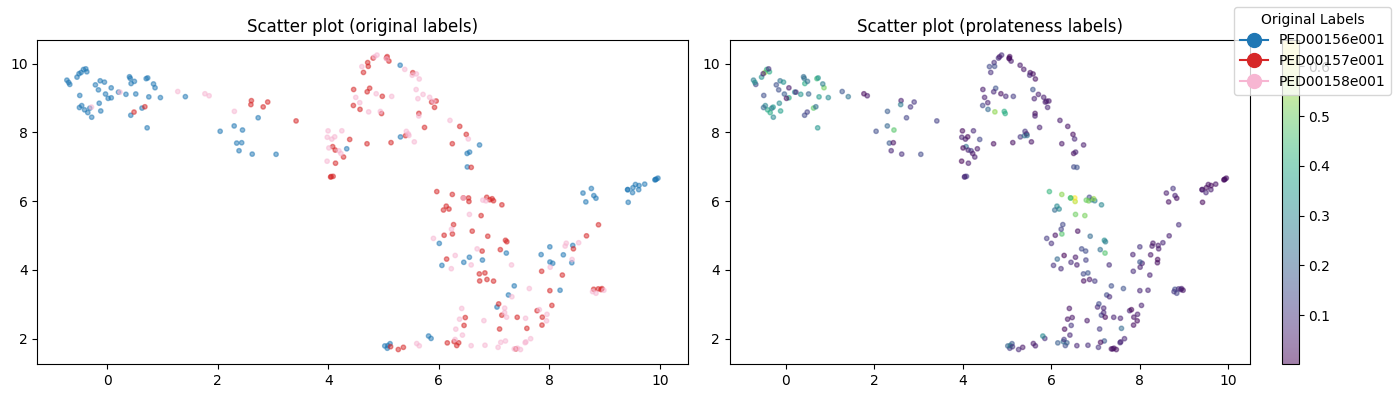

In [9]:
vis = Visualization(analysis)
vis.umap_scatter(color_by="prolateness")